# Missing value imputation

In [75]:
import pickle
with open('merged_df.pkl', 'rb') as file:
    merged_df = pickle.load(file)

In [76]:
merged_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,perimeter_worst,area_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst,smoothness_mean,texture_worst,smoothness_worst,concave_points_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.27760,0.30010,0.14710,0.2419,...,184.6,2019.0,0.6656,0.7119,0.4601,0.11890,0.11840,17.33,0.1622,0.2654
1,842517,1,20.57,17.77,132.90,1326.0,0.07864,0.08690,0.07017,0.1812,...,158.8,1956.0,0.1866,0.2416,0.2750,0.08902,0.08474,23.41,0.1238,0.1860
2,84300903,1,19.69,21.25,130.00,1203.0,0.15990,0.19740,0.12790,0.2069,...,152.5,1709.0,0.4245,0.4504,0.3613,0.08758,0.10960,25.53,0.1444,0.2430
4,84358402,1,20.29,14.34,135.10,1297.0,0.13280,0.19800,0.10430,0.1809,...,152.2,1575.0,0.2050,0.4000,0.2364,0.07678,0.10030,16.67,0.1374,0.1625
5,843786,1,12.45,15.70,82.57,477.1,0.17000,0.15780,0.08089,0.2087,...,103.4,741.6,0.5249,0.5355,0.3985,0.12440,0.12780,23.75,0.1791,0.1741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,926125,1,20.92,25.09,143.00,1347.0,0.22360,0.31740,0.14740,0.2149,...,179.1,1819.0,0.4186,0.6599,0.2929,0.09873,0.10990,29.41,0.1407,0.2542
564,926424,1,21.56,22.39,142.00,1479.0,0.11590,0.24390,0.13890,0.1726,...,166.1,2027.0,0.2113,0.4107,0.2060,0.07115,0.11100,26.40,0.1410,0.2216
565,926682,1,20.13,28.25,131.20,1261.0,0.10340,0.14400,0.09791,0.1752,...,155.0,1731.0,0.1922,0.3215,0.2572,0.06637,0.09780,38.25,0.1166,0.1628
566,926954,1,16.60,28.08,108.30,858.1,0.10230,0.09251,0.05302,0.1590,...,126.7,1124.0,0.3094,0.3403,0.2218,0.07820,0.08455,34.12,0.1139,0.1418


<Axes: >

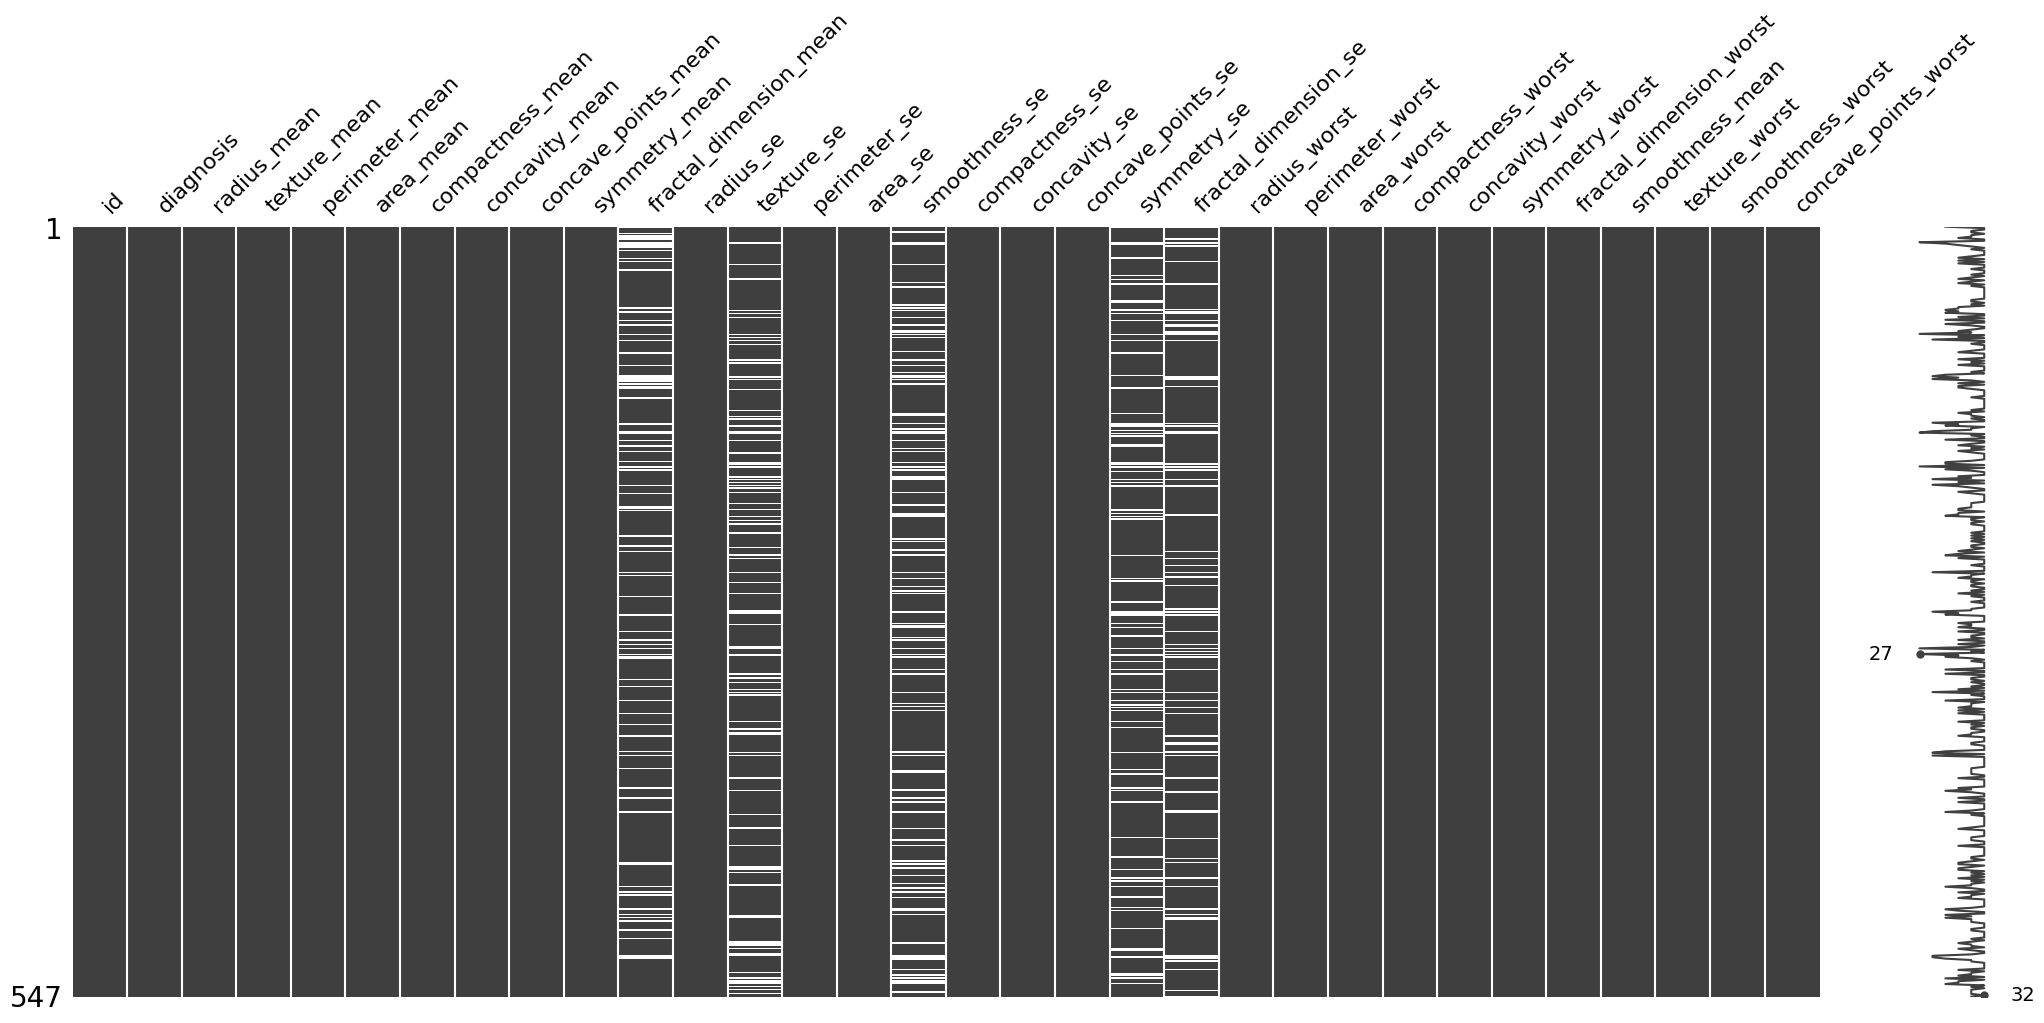

In [77]:
import missingno as msno
msno.matrix(merged_df)

In [78]:
df_nulls = merged_df.copy()
for col in df_nulls:
    if df_nulls[col].isna().sum() == 0:
        del df_nulls[col]
df_nulls

,fractal_dimension_mean,texture_se,smoothness_se,symmetry_se,fractal_dimension_se
0,NaN,0.9053,0.006399,NaN,NaN
1,0.05667,0.7339,0.005225,0.01389,0.003532
2,0.05999,0.7869,0.006150,0.02250,0.004571
4,0.05883,0.7813,NaN,0.01756,0.005115
5,NaN,0.8902,0.007510,0.02165,0.005082
...,...,...,...,...,...
563,0.06879,1.0260,0.006399,0.02057,NaN
564,0.05623,1.2560,NaN,0.01114,0.004239
565,0.05533,NaN,0.005769,0.01898,0.002498
566,0.05648,1.0750,0.005903,0.01318,0.003892


In [80]:
missing_percentage = df_nulls.isnull().mean() * 100

missing_percentage = missing_percentage.reset_index()
missing_percentage.columns = ['Column', 'Missing Percentage']
missing_percentage

,Column,Missing Percentage
0,fractal_dimension_mean,15.722121
1,texture_se,17.367459
2,smoothness_se,19.012797
3,symmetry_se,16.270567
4,fractal_dimension_se,14.076782


In [81]:
df_nulls.info()

<class 'pandas.core.frame.DataFrame'>
Index: 547 entries, 0 to 567
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   fractal_dimension_mean  461 non-null    float64
 1   texture_se              452 non-null    float64
 2   smoothness_se           443 non-null    float64
 3   symmetry_se             458 non-null    float64
 4   fractal_dimension_se    470 non-null    float64
dtypes: float64(5)
memory usage: 25.6 KB


## KNN imputer

In [82]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from scipy.stats import zscore, ks_2samp
from sklearn.impute import KNNImputer

In [83]:
final_df = merged_df.copy()
imp_cols = final_df.select_dtypes(include=['float64', 'int64']).columns
knn_imputer = KNNImputer(n_neighbors=5)
imputed_data = pd.DataFrame(knn_imputer.fit_transform(final_df[imp_cols]), columns=imp_cols, index=final_df.index)

In [84]:
final_df[imp_cols] = imputed_data
final_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,perimeter_worst,area_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst,smoothness_mean,texture_worst,smoothness_worst,concave_points_worst
0,842302.0,1,17.99,10.38,122.80,1001.0,0.27760,0.30010,0.14710,0.2419,...,184.6,2019.0,0.6656,0.7119,0.4601,0.11890,0.11840,17.33,0.1622,0.2654
1,842517.0,1,20.57,17.77,132.90,1326.0,0.07864,0.08690,0.07017,0.1812,...,158.8,1956.0,0.1866,0.2416,0.2750,0.08902,0.08474,23.41,0.1238,0.1860
2,84300903.0,1,19.69,21.25,130.00,1203.0,0.15990,0.19740,0.12790,0.2069,...,152.5,1709.0,0.4245,0.4504,0.3613,0.08758,0.10960,25.53,0.1444,0.2430
4,84358402.0,1,20.29,14.34,135.10,1297.0,0.13280,0.19800,0.10430,0.1809,...,152.2,1575.0,0.2050,0.4000,0.2364,0.07678,0.10030,16.67,0.1374,0.1625
5,843786.0,1,12.45,15.70,82.57,477.1,0.17000,0.15780,0.08089,0.2087,...,103.4,741.6,0.5249,0.5355,0.3985,0.12440,0.12780,23.75,0.1791,0.1741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,926125.0,1,20.92,25.09,143.00,1347.0,0.22360,0.31740,0.14740,0.2149,...,179.1,1819.0,0.4186,0.6599,0.2929,0.09873,0.10990,29.41,0.1407,0.2542
564,926424.0,1,21.56,22.39,142.00,1479.0,0.11590,0.24390,0.13890,0.1726,...,166.1,2027.0,0.2113,0.4107,0.2060,0.07115,0.11100,26.40,0.1410,0.2216
565,926682.0,1,20.13,28.25,131.20,1261.0,0.10340,0.14400,0.09791,0.1752,...,155.0,1731.0,0.1922,0.3215,0.2572,0.06637,0.09780,38.25,0.1166,0.1628
566,926954.0,1,16.60,28.08,108.30,858.1,0.10230,0.09251,0.05302,0.1590,...,126.7,1124.0,0.3094,0.3403,0.2218,0.07820,0.08455,34.12,0.1139,0.1418


<Axes: >

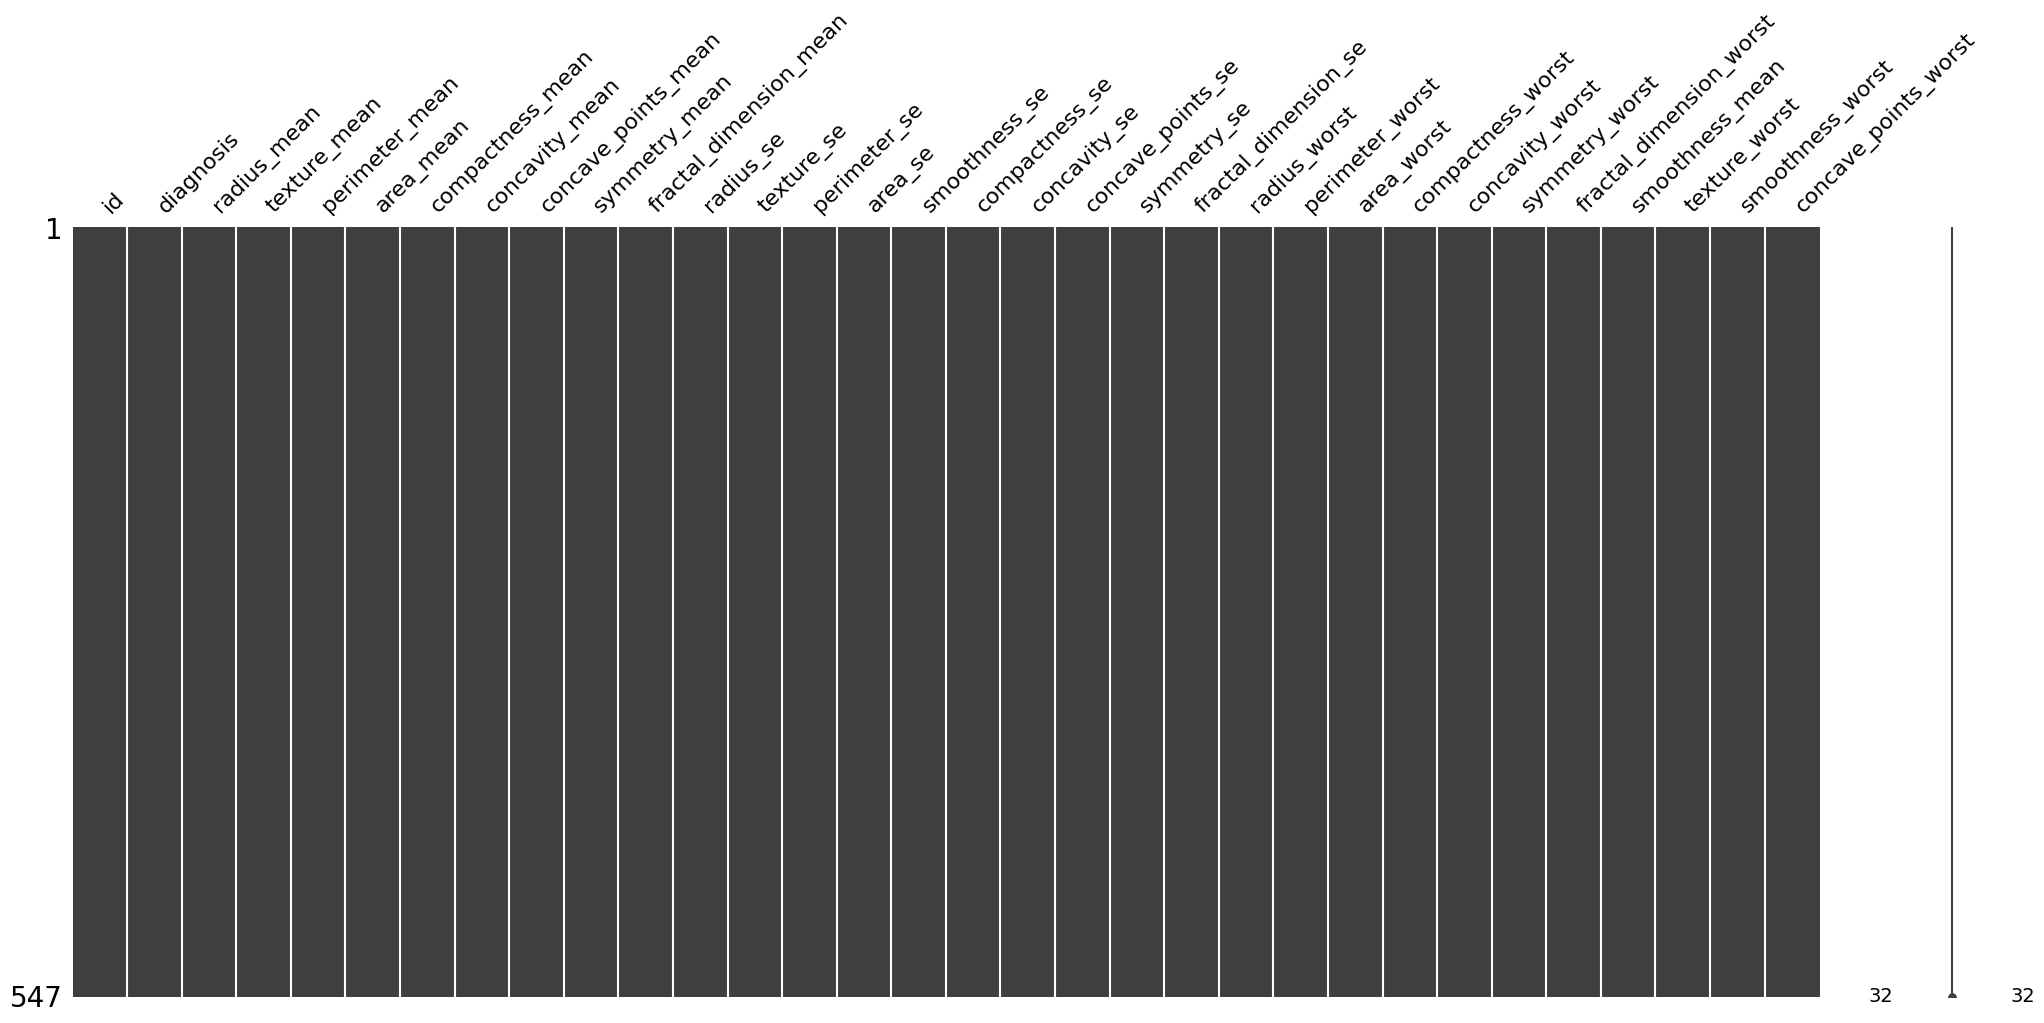

In [85]:
msno.matrix(final_df)

In [86]:
final_df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
perimeter_worst            0
area_worst                 0
compactness_worst          0
concavity_worst            0
symmetry_worst             0
fractal_dimension_worst    0
smoothness_mean            0
texture_worst              0
smoothness_worst           0
concave_points_worst       0
dtype: int64

In [87]:
final_df.to_pickle('final_df.pkl')

In [88]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 547 entries, 0 to 567
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       547 non-null    float64
 1   diagnosis                547 non-null    int32  
 2   radius_mean              547 non-null    float64
 3   texture_mean             547 non-null    float64
 4   perimeter_mean           547 non-null    float64
 5   area_mean                547 non-null    float64
 6   compactness_mean         547 non-null    float64
 7   concavity_mean           547 non-null    float64
 8   concave_points_mean      547 non-null    float64
 9   symmetry_mean            547 non-null    float64
 10  fractal_dimension_mean   547 non-null    float64
 11  radius_se                547 non-null    float64
 12  texture_se               547 non-null    float64
 13  perimeter_se             547 non-null    float64
 14  area_se                  547 no

## normalization

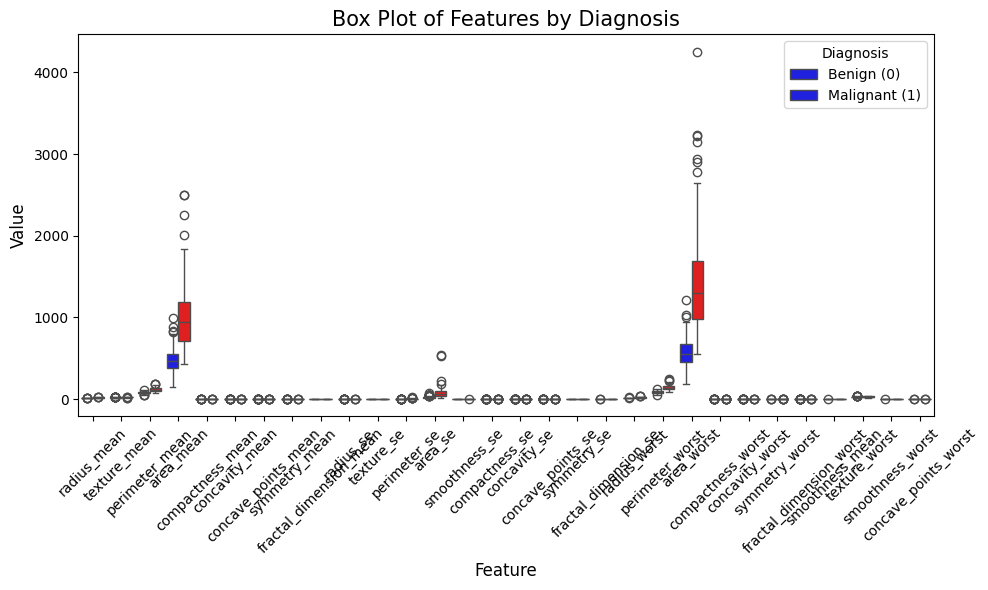

In [90]:
import seaborn as sns
value_vars = [col for col in final_df.columns if col not in ['diagnosis', 'id']]

melted_final_df = final_df.melt(id_vars=['diagnosis'], value_vars=value_vars, var_name='feature', value_name='value')

plt.figure(figsize=(10, 6))
sns.boxplot(x='feature', y='value', hue='diagnosis', data=melted_final_df, palette={0: 'blue', 1: 'red'}, dodge=True)

plt.title('Box Plot of Features by Diagnosis', fontsize=15)
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.legend(title='Diagnosis', loc='upper right', labels=['Benign (0)', 'Malignant (1)'])
plt.xticks(rotation=45) 

plt.tight_layout() 
plt.show()


In [73]:
from sklearn.preprocessing import MinMaxScaler

numeric_cols = [col for col in final_df.columns if col not in ['diagnosis', 'id']]
scaler = MinMaxScaler()

normalized_values = scaler.fit_transform(final_df[numeric_cols])
normalized_df = pd.DataFrame(normalized_values, columns=numeric_cols)

normalized_df['diagnosis'] = final_df['diagnosis'].values

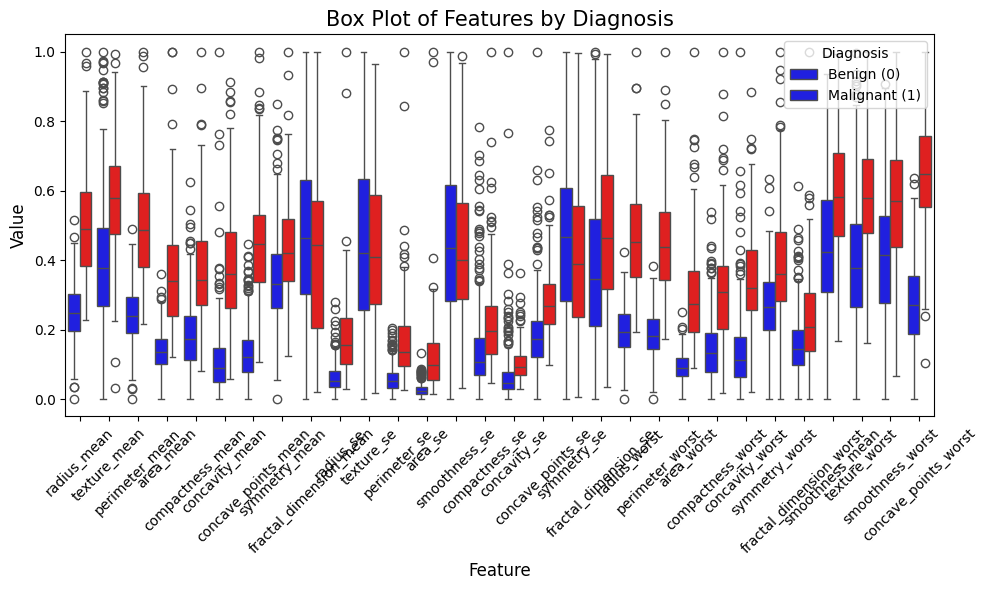

In [91]:
melted_final_df = normalized_df.melt(id_vars=['diagnosis'], var_name='feature', value_name='value')

plt.figure(figsize=(10, 6))
sns.boxplot(x='feature', y='value', hue='diagnosis', data=melted_final_df, palette={0: 'blue', 1: 'red'}, dodge=True)

plt.title('Box Plot of Features by Diagnosis', fontsize=15)
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.legend(title='Diagnosis', loc='upper right', labels=['Benign (0)', 'Malignant (1)'])
plt.xticks(rotation=45)

plt.tight_layout() 
plt.show()
